In [129]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[common_cols]])
print(common_df.shape)
common_df.head()

(87439, 10)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대


In [39]:
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
common_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대


In [40]:
common_df['계약날짜'].dtype

dtype('<M8[ns]')

In [4]:
common_df['용도지역'].unique()

array(['제2종일반주거지역', '준주거지역', '제3종일반주거지역', '제1종전용주거지역', '제1종일반주거지역',
       '일반상업지역', '준공업지역', '근린상업지역', '자연녹지지역', '개발제한구역', '제2종일반주거',
       '제1종일반주거', '일반상업', '준주거', '제3종일반주거', '제1종전용주거', '준공업', '근린상업',
       '자연녹지', '중심상업', '유통상업', '일반주거지역', '기타', '유통상업지역', '제2종전용주거지역',
       '용도미지정', '중심상업지역', '생산녹지지역', nan, '전용주거지역', '관리지역', '계획관리지역',
       '보전녹지지역'], dtype=object)

In [5]:
target = '천호동'
target_purpose1 = '2종일반'
target_purpose2 = '준주거'

In [43]:
target_df = common_df[common_df['시군구'].str.contains('천호동')]
print(target_df.shape)
target_df.head()

(643, 10)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형
1170,서울특별시 강동구 천호동,106-4,제2종일반주거지역,12m미만,2018-12-07,18.83,9900.0,525.756771,1738.038848,연립/다세대
1171,서울특별시 강동구 천호동,106-4,제2종일반주거지역,12m미만,2018-12-08,18.87,9900.0,524.642289,1734.354610,연립/다세대
1172,서울특별시 강동구 천호동,106-4,제2종일반주거지역,12m미만,2021-01-26,18.83,12000.0,637.280935,2106.713755,연립/다세대
1173,서울특별시 강동구 천호동,25-36,제3종일반주거지역,8m미만,2015-03-24,93.40,55000.0,588.865096,1946.661403,연립/다세대
1174,서울특별시 강동구 천호동,25-36,제3종일반주거지역,8m미만,2015-03-24,93.40,55000.0,588.865096,1946.661403,연립/다세대


In [44]:
target_df['용도지역'].unique()

array(['제2종일반주거지역', '제3종일반주거지역', '준주거지역', '일반상업지역', '제2종일반주거', '일반상업',
       '준주거', '제3종일반주거'], dtype=object)

In [45]:
target1_df = target_df[target_df['용도지역'].str.contains(target_purpose1)].sort_values(['계약날짜'])
print(target1_df.shape)
target1_df.head()

(352, 10)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형
65,서울특별시 강동구 천호동,2**,제2종일반주거,8m미만,2015-01-09,334.10,163650.0,489.823406,1619.250869,상업/업무
1195,서울특별시 강동구 천호동,219-1,제2종일반주거지역,8m미만,2015-01-13,55.36,22000.0,397.398844,1313.715137,연립/다세대
67,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2015-01-16,386.20,234550.0,607.327809,2007.695162,상업/업무
641,서울특별시 강동구 천호동,2**,제2종일반주거지역,-,2015-02-24,3.00,200.0,66.666667,220.385667,토지
842,서울특별시 강동구 천호동,3**,제2종일반주거지역,12m미만,2015-03-10,86.30,41000.0,475.086906,1570.535168,토지


In [134]:
target1_df.head(50)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형
65,서울특별시 강동구 천호동,2**,제2종일반주거,8m미만,2015-01-09,334.10,163650.0,489.823406,1619.250869,상업/업무
1195,서울특별시 강동구 천호동,219-1,제2종일반주거지역,8m미만,2015-01-13,55.36,22000.0,397.398844,1313.715137,연립/다세대
67,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2015-01-16,386.20,234550.0,607.327809,2007.695162,상업/업무
641,서울특별시 강동구 천호동,2**,제2종일반주거지역,-,2015-02-24,3.00,200.0,66.666667,220.385667,토지
842,서울특별시 강동구 천호동,3**,제2종일반주거지역,12m미만,2015-03-10,86.30,41000.0,475.086906,1570.535168,토지
1191,서울특별시 강동구 천호동,1**,제2종일반주거지역,25m미만,2015-03-28,46.00,17000.0,369.565217,1221.703152,토지
1203,서울특별시 강동구 천호동,3*,제2종일반주거지역,12m미만,2015-03-30,275.80,157700.0,571.791153,1890.218617,토지
1242,서울특별시 강동구 천호동,276-0,제2종일반주거지역,8m미만,2015-03-30,65.60,23000.0,350.609756,1159.040473,연립/다세대
1250,서울특별시 강동구 천호동,2**,제2종일반주거지역,25m미만,2015-04-01,180.54,100000.0,553.893874,1831.054060,토지
70,서울특별시 강동구 천호동,2**,제2종일반주거,25m미만,2015-04-11,208.00,117300.0,563.942308,1864.272022,상업/업무


In [46]:
target2_df = target_df[target_df['용도지역'].str.contains(target_purpose2)].sort_values(['계약날짜'])
print(target2_df.shape)
target2_df.head()

(93, 10)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형
69,서울특별시 강동구 천호동,4**,준주거,8m미만,2015-04-01,61.25,40000.0,653.061224,2158.880000,상업/업무
1443,서울특별시 강동구 천호동,1**,준주거지역,-,2015-04-12,7.00,700.0,100.000000,330.578500,토지
4978,서울특별시 강동구 천호동,1**,준주거지역,8m미만,2015-09-25,15.00,4000.0,266.666667,881.542667,토지
5448,서울특별시 강동구 천호동,1**,준주거지역,-,2015-10-25,15.00,4000.0,266.666667,881.542667,토지
19483,서울특별시 강동구 천호동,560-1,준주거지역,8m미만,2016-03-11,27.00,13200.0,488.888889,1616.161556,연립/다세대


<AxesSubplot:>

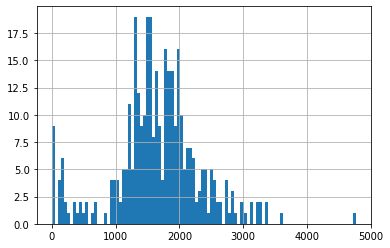

In [19]:
target1_df['단가(평)'].hist(bins=100)

<AxesSubplot:title={'center':'2015~최신 천호동 2종일반주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 352건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

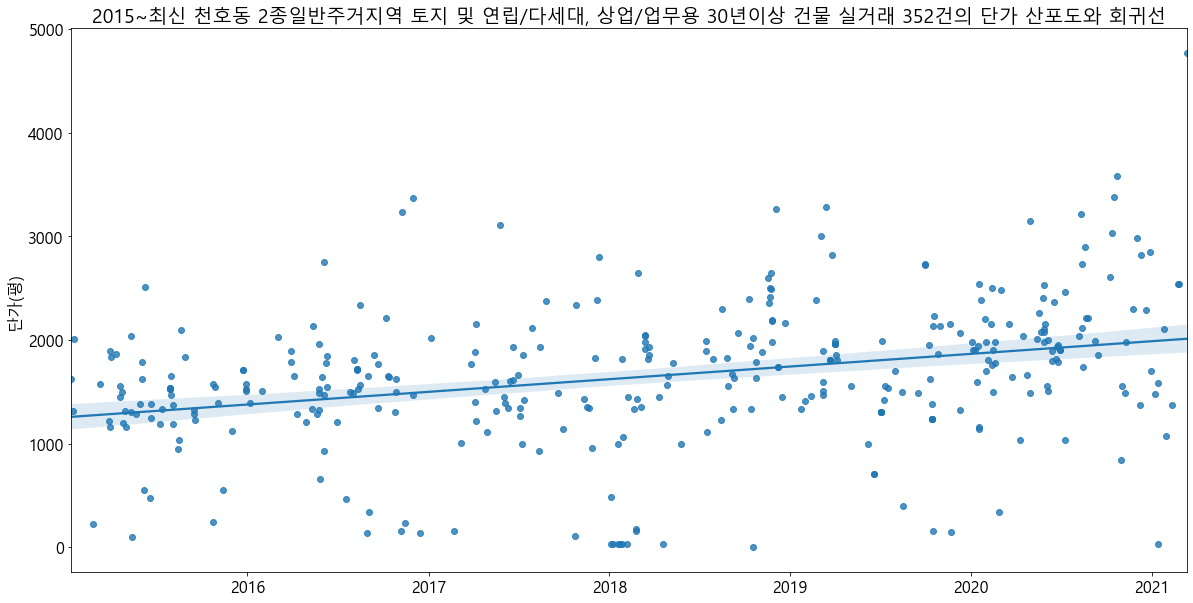

In [132]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose1, target1_df.shape[0]))
ax.xaxis.update_units(target1_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target1_df['계약날짜']), y=target1_df['단가(평)'])

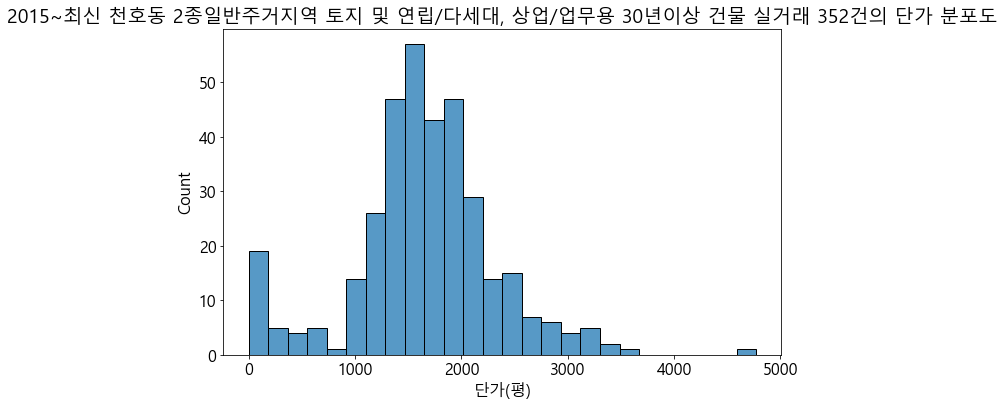

거래량: 352.0
평균: 1653.9773148759489
표준편차: 685.8550906506451
최소: 0.4461248313090418
25분위: 1330.3768902439026
중간값: 1643.823833484265
75분위: 1991.9371079796574
최대: 4771.236082474227


<Figure size 432x288 with 0 Axes>

In [131]:
f, ax = plt.subplots(figsize=(10,6))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(target, target_purpose1, target1_df.shape[0]))
sns.histplot(target1_df['단가(평)'])
plt.show()
plt.clf()

description = target1_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])

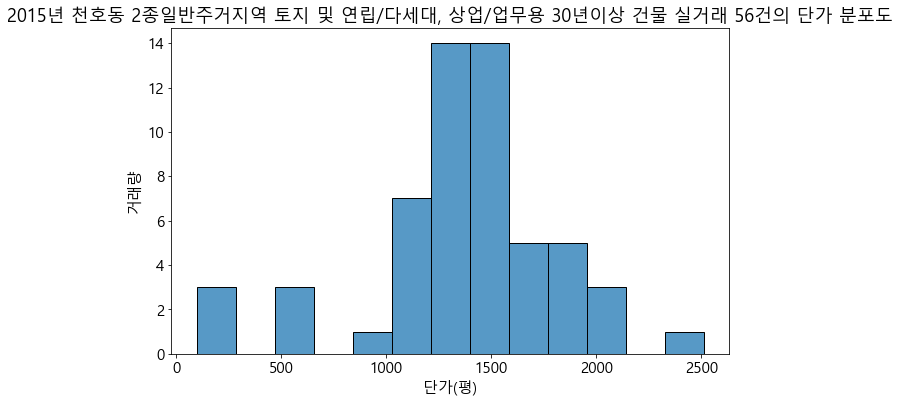

거래량: 56.0
평균: 1375.9836264346002
표준편차: 458.72636834498206
최소: 96.285
25분위: 1214.8489862402616
중간값: 1420.272187867647
75분위: 1583.8071633338013
최대: 2511.961628289474


<Figure size 432x288 with 0 Axes>

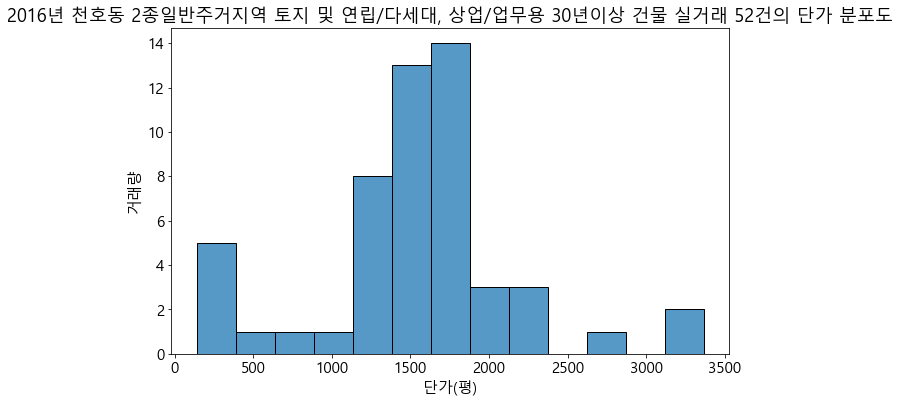

거래량: 52.0
평균: 1520.9999844325444
표준편차: 658.718724986803
최소: 138.70426573426576
25분위: 1318.1028089171975
중간값: 1536.9824834162523
75분위: 1783.4601409359452
최대: 3367.6166499666


<Figure size 432x288 with 0 Axes>

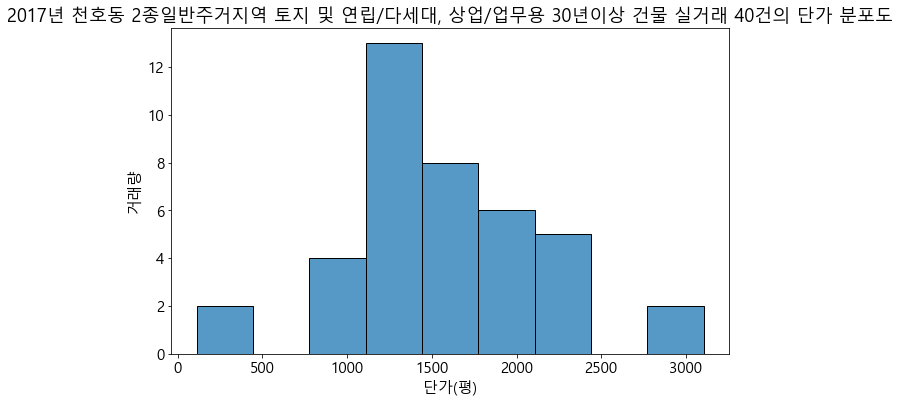

거래량: 40.0
평균: 1566.5176004210575
표준편차: 593.1865958509932
최소: 111.74484507042251
25분위: 1302.027617729204
중간값: 1468.2019203506097
75분위: 1896.7375475911283
최대: 3105.434393939394


<Figure size 432x288 with 0 Axes>

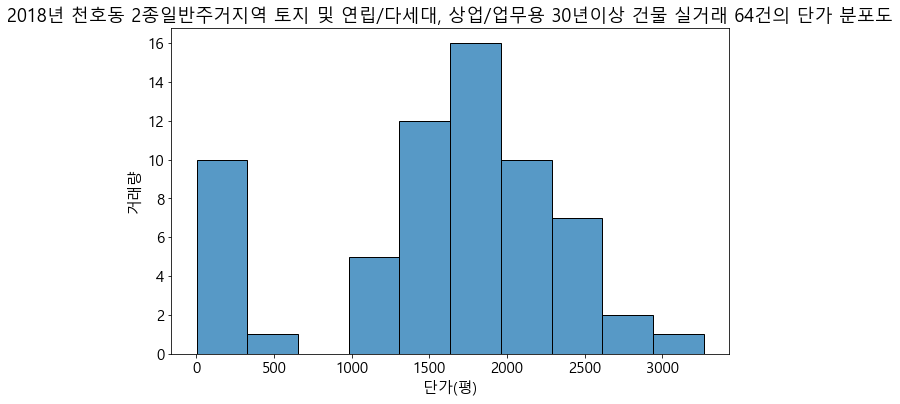

거래량: 64.0
평균: 1551.1726582748595
표준편차: 795.3547338058778
최소: 0.4461248313090418
25분위: 1303.567780182927
중간값: 1756.3083425034783
75분위: 2025.8540764635945
최대: 3268.2192613636366


<Figure size 432x288 with 0 Axes>

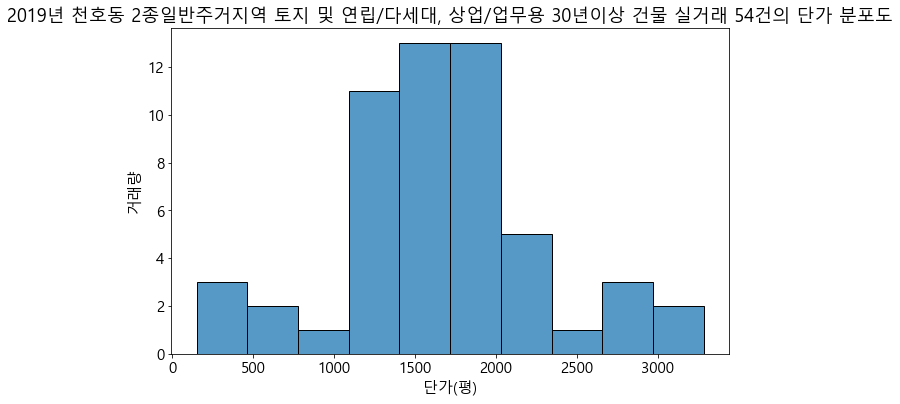

거래량: 54.0
평균: 1657.3557895395452
표준편차: 626.6328685926208
최소: 150.3149126901798
25분위: 1312.396645
중간값: 1575.3363975583866
75분위: 1964.8842570281124
최대: 3283.504079460802


<Figure size 432x288 with 0 Axes>

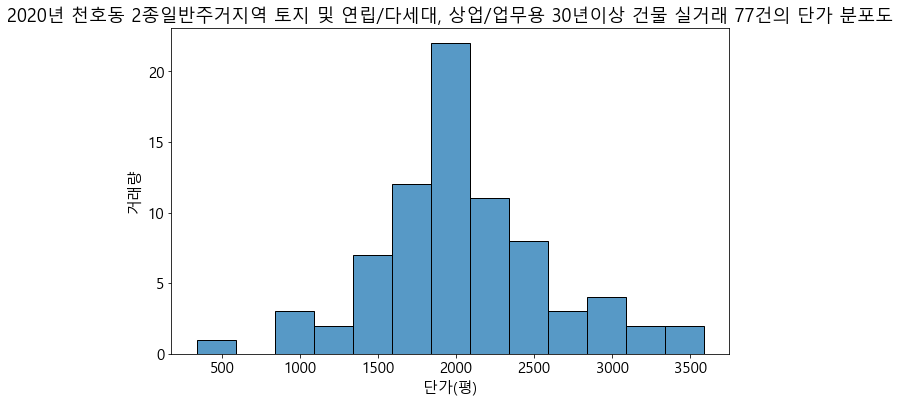

거래량: 77.0
평균: 2040.4363315453897
표준편차: 570.1279128448632
최소: 338.890918762089
25분위: 1763.0853333333337
중간값: 1983.471
75분위: 2296.960116731518
최대: 3587.1090333241536


<Figure size 432x288 with 0 Axes>

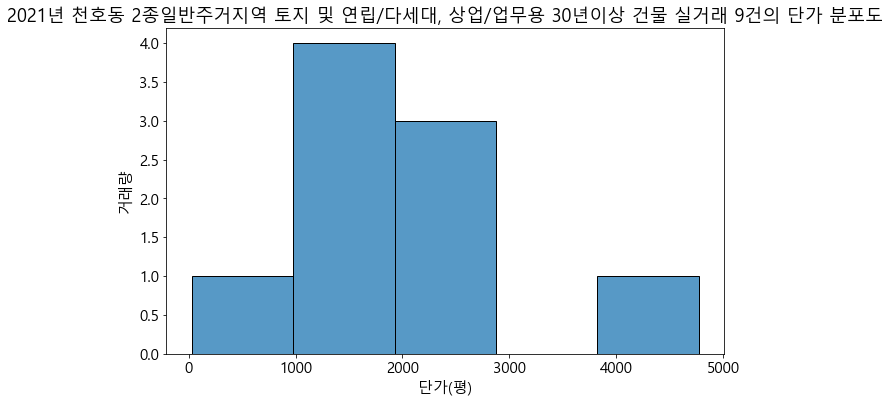

거래량: 9.0
평균: 1945.1520283267087
표준편차: 1314.4443812692564
최소: 28.498146551724144
25분위: 1375.1185524126456
중간값: 1588.753915984336
75분위: 2540.5664002459266
최대: 4771.236082474227


<Figure size 432x288 with 0 Axes>

In [126]:
for year in target1_df['계약날짜'].dt.year.unique():
    year_df = target1_df[target1_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose1, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [34]:
target1_df['단가(평)'].describe()

count     352.000000
mean     1653.977315
std       685.855091
min         0.446125
25%      1330.376890
50%      1643.823833
75%      1991.937108
max      4771.236082
Name: 단가(평), dtype: float64

<AxesSubplot:title={'center':'2015~최신 천호동 준주거주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 93건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

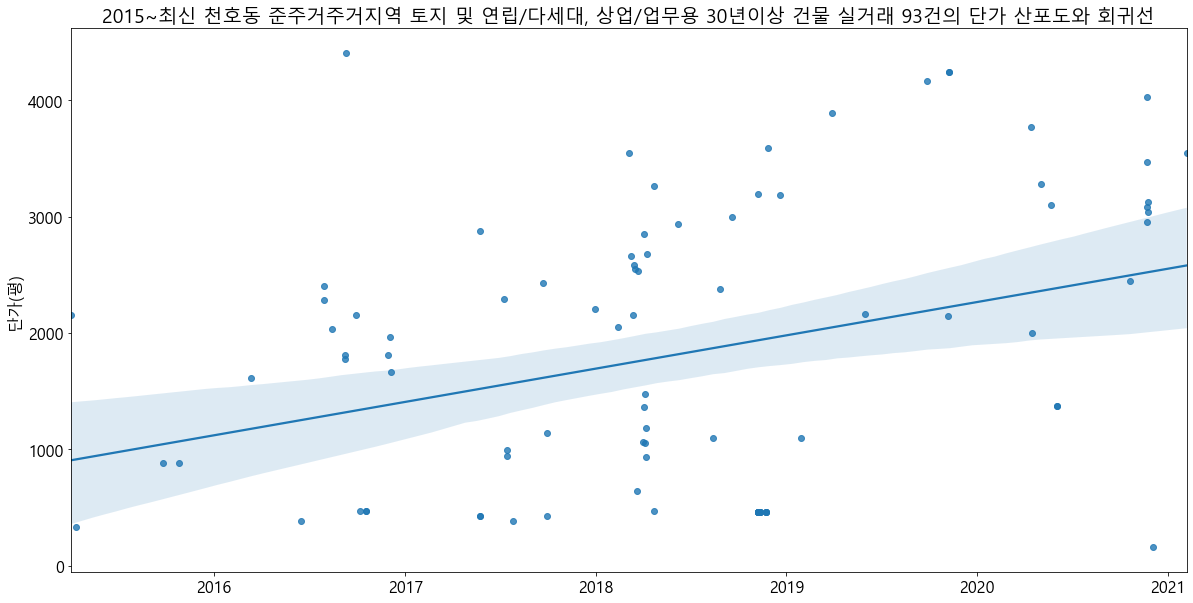

In [133]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose2, target2_df.shape[0]))
ax.xaxis.update_units(target2_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target2_df['계약날짜']), y=target2_df['단가(평)'])

In [136]:
print(land_df.shape)
land_df.head()

(40532, 13)


,시군구,번지,지목,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),지분구분,해제사유발생일,단가(㎡),단가(평),거래유형
0,서울특별시 종로구 부암동,산1*,임야,개발제한구역,-,2015-01-01,1388.00,11000.0,,NaN,7.925072,26.198584,토지
1,서울특별시 은평구 녹번동,5*,대,제2종일반주거지역,8m미만,2015-01-01,11.00,2500.0,,NaN,227.272727,751.314773,토지
2,서울특별시 중구 장충동1가,3*,대,제2종일반주거지역,-,2015-01-02,4.50,1000.0,,NaN,222.222222,734.618889,토지
3,서울특별시 노원구 월계동,산1**,임야,자연녹지지역,12m미만,2015-01-02,82.18,1753.0,지분,NaN,21.331224,70.516441,토지
4,서울특별시 용산구 한남동,*,대,제1종일반주거지역,8m미만,2015-01-02,28.00,17374.0,,NaN,620.500000,2051.239593,토지


In [137]:
land_target_df = land_df[land_df['시군구'].str.contains('천호동')]
print(land_target_df.shape)
land_target_df.head()

(305, 13)


,시군구,번지,지목,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),지분구분,해제사유발생일,단가(㎡),단가(평),거래유형
154,서울특별시 강동구 천호동,4**,대,제3종일반주거지역,8m미만,2015-01-15,37.0,7300.0,,NaN,197.297297,652.222446,토지
641,서울특별시 강동구 천호동,2**,도로,제2종일반주거지역,-,2015-02-24,3.0,200.0,,NaN,66.666667,220.385667,토지
842,서울특별시 강동구 천호동,3**,대,제2종일반주거지역,12m미만,2015-03-10,86.3,41000.0,,NaN,475.086906,1570.535168,토지
1191,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,25m미만,2015-03-28,46.0,17000.0,,NaN,369.565217,1221.703152,토지
1203,서울특별시 강동구 천호동,3*,대,제2종일반주거지역,12m미만,2015-03-30,275.8,157700.0,,NaN,571.791153,1890.218617,토지


In [138]:
land_target1_df = land_target_df[land_target_df['용도지역'].str.contains(target_purpose1)]
print(land_target1_df.shape)
land_target1_df.head()

(133, 13)


,시군구,번지,지목,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),지분구분,해제사유발생일,단가(㎡),단가(평),거래유형
641,서울특별시 강동구 천호동,2**,도로,제2종일반주거지역,-,2015-02-24,3.00,200.0,,NaN,66.666667,220.385667,토지
842,서울특별시 강동구 천호동,3**,대,제2종일반주거지역,12m미만,2015-03-10,86.30,41000.0,,NaN,475.086906,1570.535168,토지
1191,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,25m미만,2015-03-28,46.00,17000.0,,NaN,369.565217,1221.703152,토지
1203,서울특별시 강동구 천호동,3*,대,제2종일반주거지역,12m미만,2015-03-30,275.80,157700.0,,NaN,571.791153,1890.218617,토지
1250,서울특별시 강동구 천호동,2**,대,제2종일반주거지역,25m미만,2015-04-01,180.54,100000.0,지분,NaN,553.893874,1831.054060,토지


<AxesSubplot:title={'center':'2015~최신 천호동 2종일반주거지역 토지  실거래 133건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

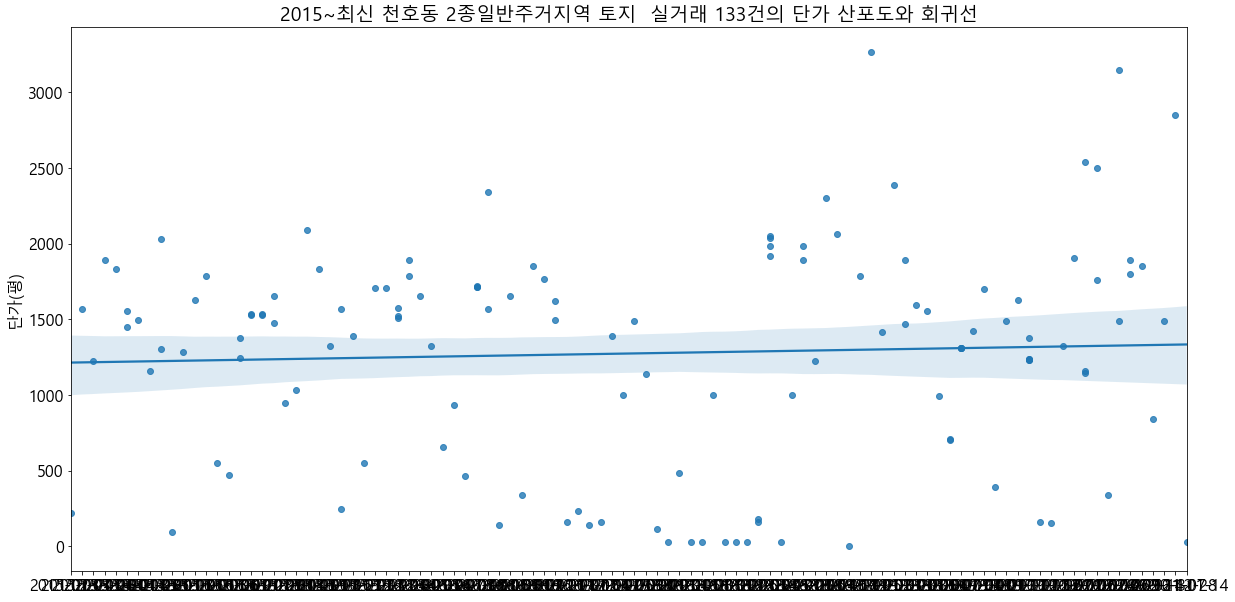

In [139]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {}주거지역 토지  실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose1, land_target1_df.shape[0]))
ax.xaxis.update_units(land_target1_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(land_target1_df['계약날짜']), y=land_target1_df['단가(평)'])

In [140]:
land_target1_df.tail(50)

,시군구,번지,지목,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),지분구분,해제사유발생일,단가(㎡),단가(평),거래유형
23316,서울특별시 강동구 천호동,2*,대,제2종일반주거지역,8m미만,2018-07-16,90.40,54358.0,,NaN,601.305310,1987.786073,토지
23321,서울특별시 강동구 천호동,2*,대,제2종일반주거지역,8m미만,2018-07-16,162.70,92991.0,,NaN,571.548863,1889.417658,토지
23688,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,-,2018-08-14,10.00,3700.0,,NaN,370.000000,1223.140450,토지
23713,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,25m미만,2018-08-16,65.00,45218.0,,NaN,695.661538,2299.707479,토지
24419,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,8m미만,2018-09-18,40.00,25000.0,,NaN,625.000000,2066.115625,토지
24820,서울특별시 강동구 천호동,5**,대,제2종일반주거지역,-,2018-10-19,74.10,10.0,,NaN,0.134953,0.446125,토지
24918,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,8m미만,2018-10-25,66.50,36000.0,지분,NaN,541.353383,1789.597895,토지
25636,서울특별시 강동구 천호동,4**,대,제2종일반주거지역,-,2018-12-03,44.00,43500.0,,NaN,988.636364,3268.219261,토지
26591,서울특별시 강동구 천호동,1**,대,제2종일반주거지역,12m미만,2019-01-31,22.00,9411.0,,NaN,427.772727,1414.124665,토지
26836,서울특별시 강동구 천호동,2**,도로,제2종일반주거지역,-,2019-02-23,7.00,5055.0,,NaN,722.142857,2387.249025,토지
